In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#show image

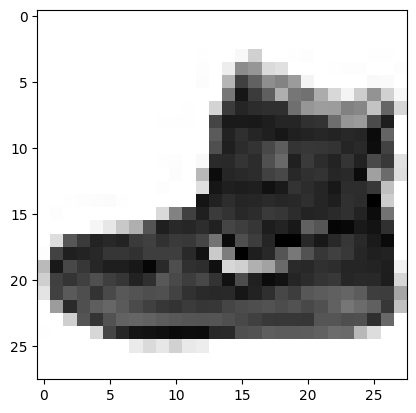

In [9]:
plt.imshow(x_train[0], cmap="Greys")

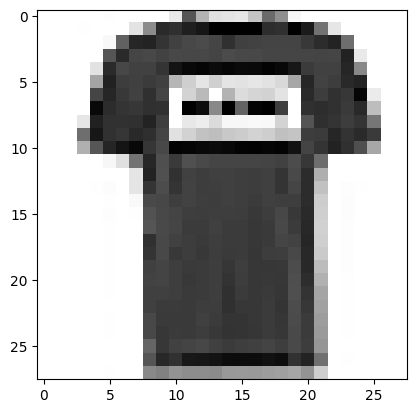

In [11]:
plt.imshow(x_train[1], cmap="Greys")

In [15]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

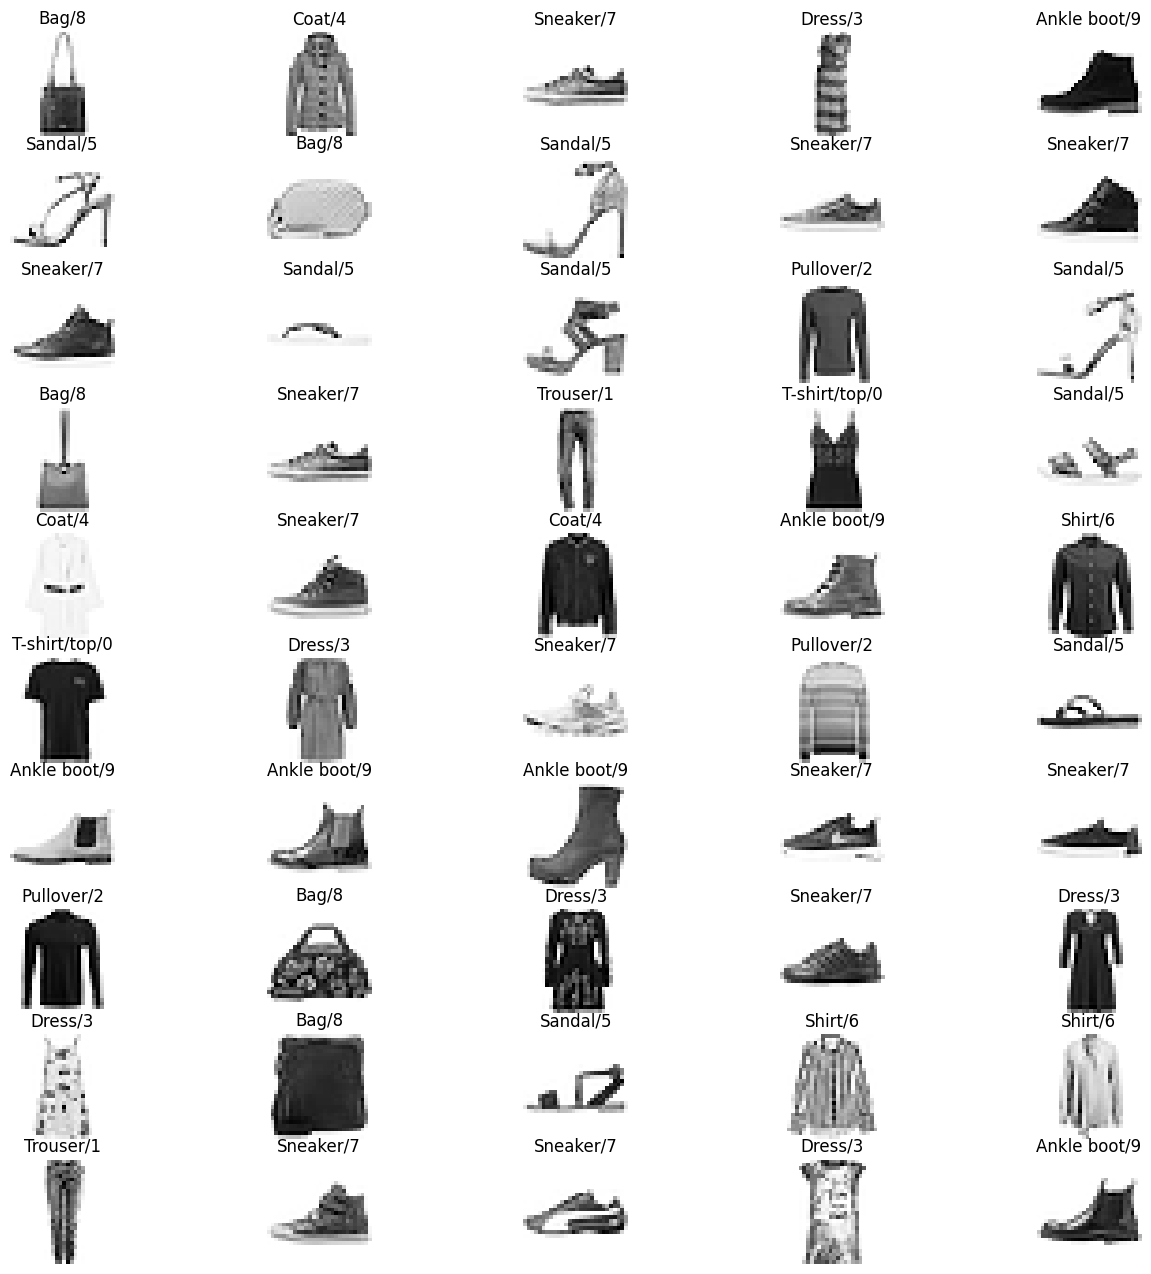

In [18]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 50):
  plt.subplot(10,5,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [19]:
## to check the dimention we used ndim

In [20]:
x_train.ndim

3

In [21]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [22]:
x_train.ndim

4

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
## Feature Scaling

In [25]:
x_train=x_train/255
x_test=x_test/255

In [27]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(x_train,y_train, test_size=0.2, random_state= 2020)

In [30]:
x_train.shape

(48000, 28, 28, 1)

In [31]:
x_val.shape

(12000, 28, 28, 1)

In [36]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')

])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs= 20, batch_size=512, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
94/94 [==============================] - 3s 28ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.4921 - val_accuracy: 0.9183
Epoch 2/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.4993 - val_accuracy: 0.9196
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.5055 - val_accuracy: 0.9201
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.5099 - val_accuracy: 0.9205
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.5144 - val_accuracy: 0.9205
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.5174 - val_accuracy: 0.9204
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.5214 - val_accuracy: 0.9200
Epoch 8/20
94/94 [=

In [42]:
#model testing

In [46]:
model.predict(np.expand_dims(x_test[0], axis=0)).round(2)

1/1 [==============================] - 0s 144ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [47]:
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 33ms/step


9

In [48]:
y_test[0]

9

In [49]:
y_pred = model.predict(x_test).round(2)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.9170


[0.5437787771224976, 0.9169999957084656]

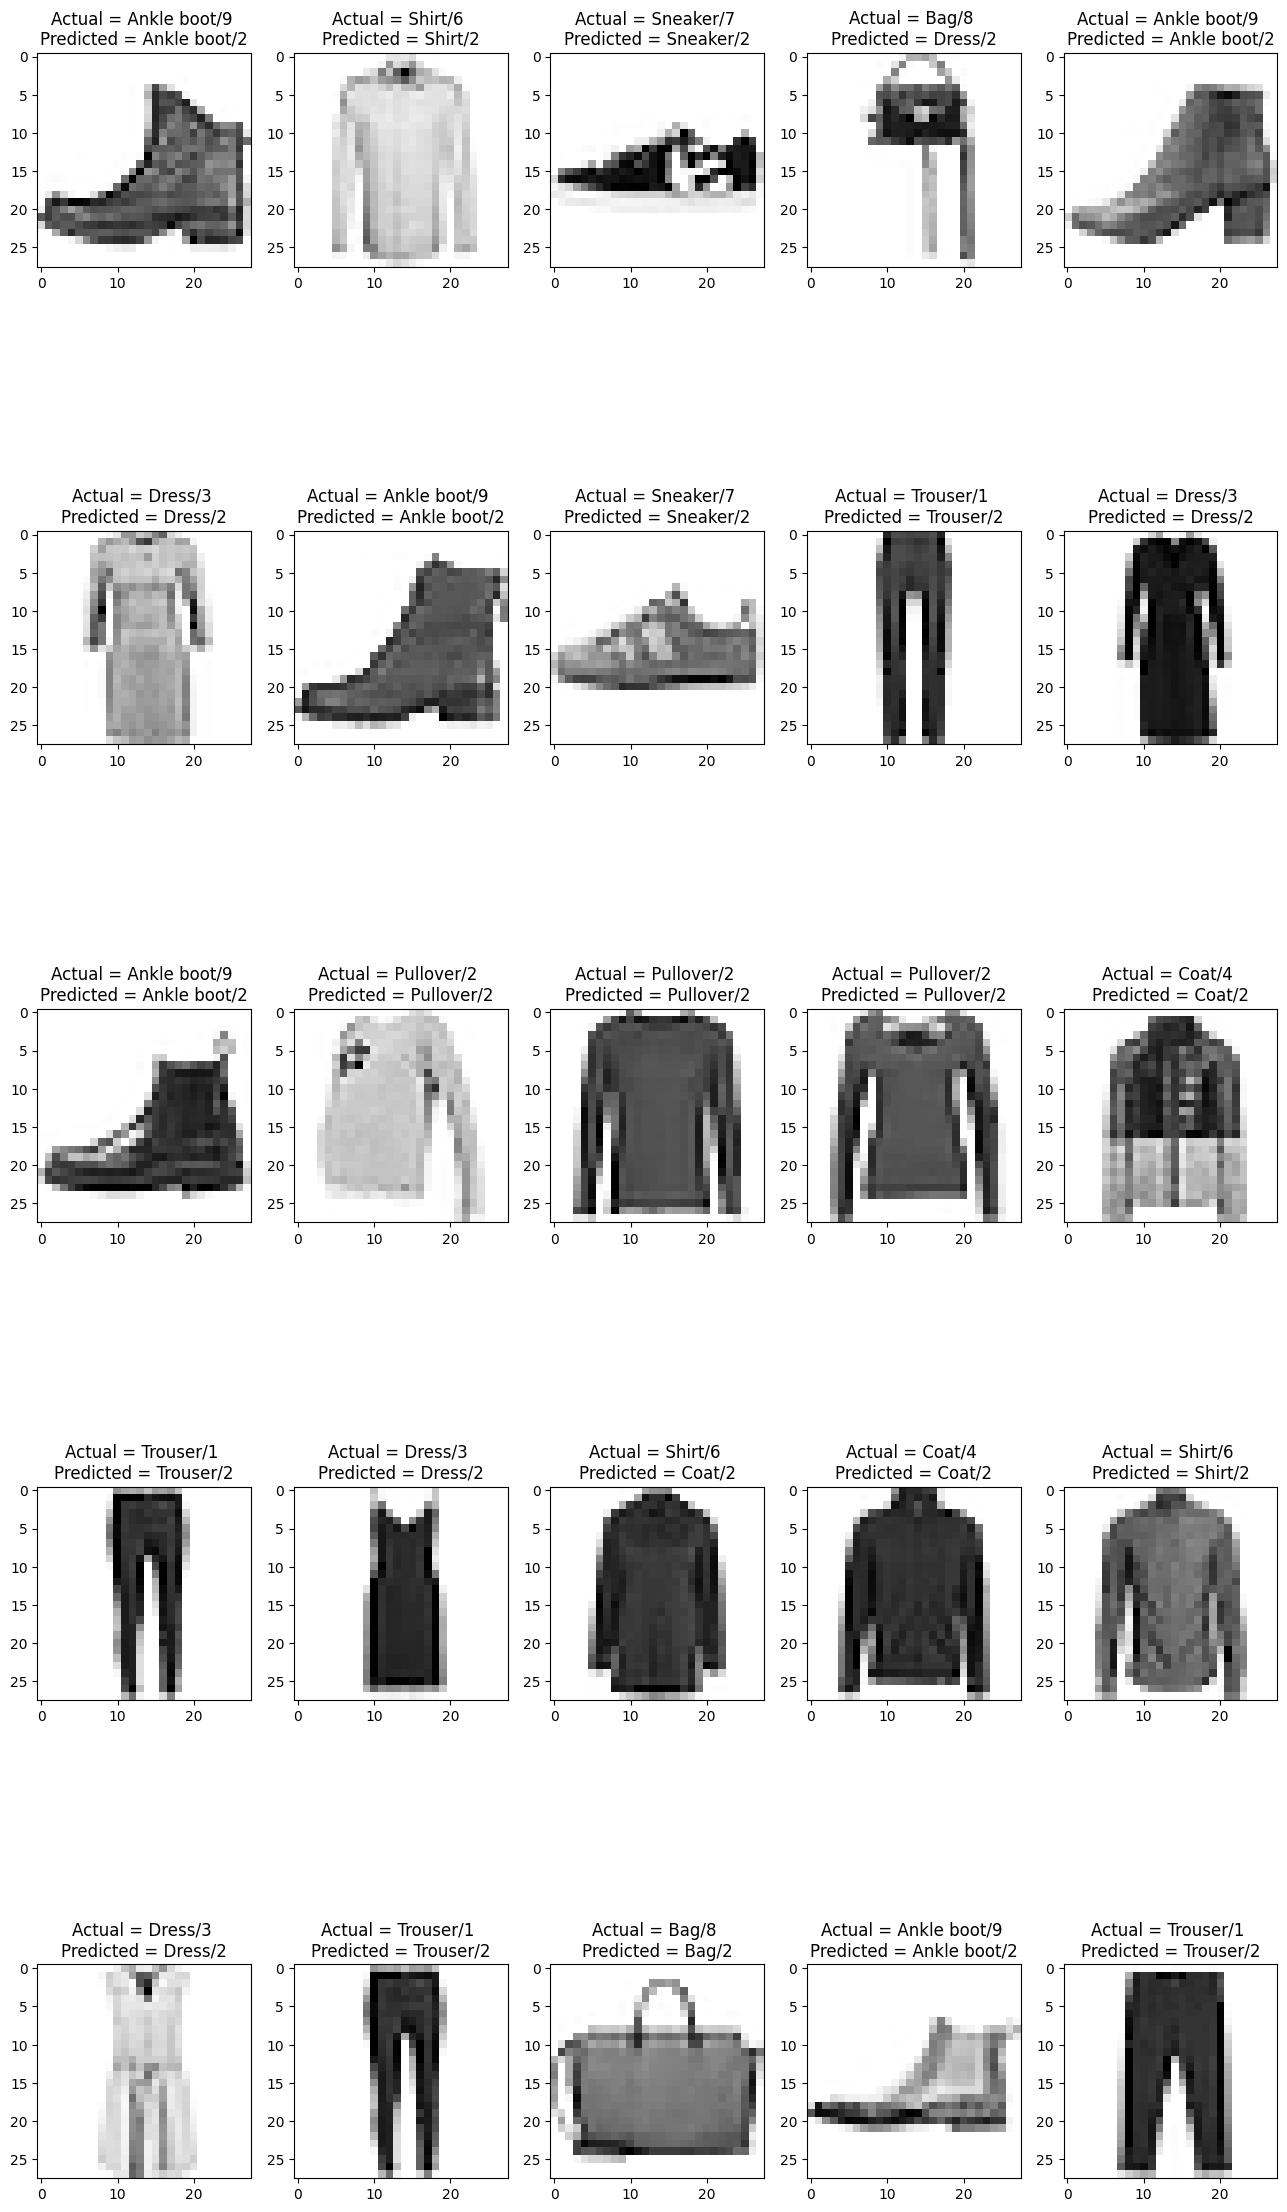

In [55]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {}/{} \nPredicted = {}/{}' .format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[1])))

<Axes: >

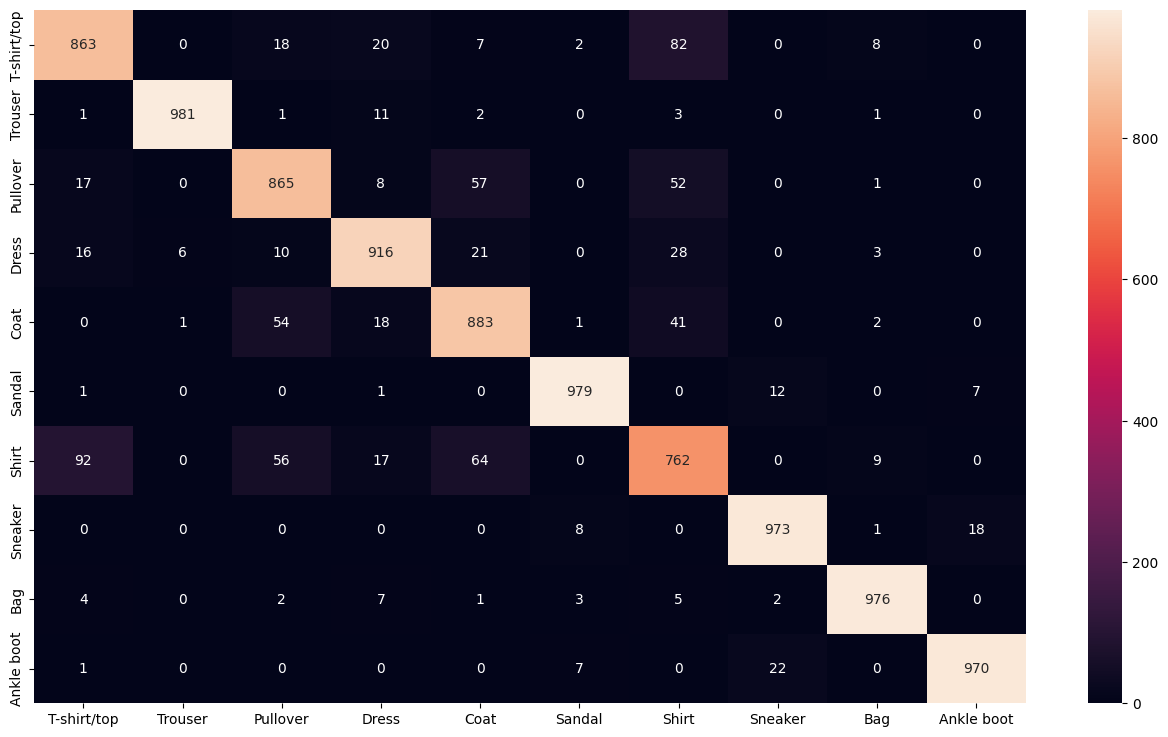

In [56]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)